<a href="https://colab.research.google.com/github/RuriEnciso/Practica_canal/blob/main/Copia_de_customers_and_orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Challenge ! Custiomers and Orders - The lifeblood of any business!

This notebook depends on two data files: customers.scv and orders.csv. These files are hosted in the cloud (or Github), so for simplicity, we are providing you with the code to download and save the two files in a folder called 'sample_data' which lives within this notebook session (not on your local computer nor Google Drive).

![sample_data folder in notebook session](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/sample_data_folder.png)

Please execute the first code snippet before moving to the rest of the exercise as this code will import the data from the files for you to be able to execute the rest of the exercise.

Remember as we said in the previous lecture, you have to save this notebook into your Google Drive by going to menu File/Save a Copy In Drive, or clicking in the button "Copy to Drive". This way, you will not lose any work you've done and the file will persist with your latest changes in your Google Drive. Also we recommend you to rename your .ipynb in your Google Drive, so you can easily find it in the future.

In [2]:
import requests

def import_data_files():
  r = requests.get('https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/customers.csv')
  with open('./sample_data/customers.csv', 'wb') as f:
    f.write(r.content)

  r = requests.get('https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv')
  with open('./sample_data/orders.csv', 'wb') as f:
    f.write(r.content)
  
import_data_files()
print("Customers and orders CSV files have been added './sample_data'")

Customers and orders CSV files have been added './sample_data'


# Exercise 1: Processing Customers data (difficulty medium)

The sample customer data in 'customers.csv' file has just 5 columns: CustomerId, First Name, Last Name, City and State

![Data sample](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/customers.png)

We strongly recommend that you complete from the [Prep Course: Intro to Python](https://colab.research.google.com/github/anyoneai/notebooks/blob/main/python3_crash_course.ipynb) the following section:
- Section 7: File I/O (to understand how to read CSV file) 
- Section 6: For Loop (to navigate the contents of the CSV file)
- Section 5: Tuples, Lists, and Dictionaries (to manipulate the data of the CSV file)

With this, we hope you can complete this exercise successfully. Although if you want to solve this with libraries or any other way, you are welcome to do it your way.

*Hint:* We advise you to take a look at the data before you start.
**if you want to manually take a look at the data before you start, please see the content of the data [here](https://github.com/anyoneai/notebooks/blob/main/customers_and_orders/data/customers.csv).

*Hint*: There are many ways to do this exercise you can do your own, although here's some help. You can solve this exercise reading and parsing CSV files, structuring data into dictionaries, and using for loops to navigate the contents

*Hint*: Also, keep in mind that data might not be clean and you might have to figure out how to deal with that data from the code, without having to modify the data source.

Below are the 5 questions you'll have to answer to pass the evaluation:

**Question 1:** How many customers are in the file?
(as help, we have added some comments and starter code to help you structure the solution)

In [29]:
from os.path import exists
import csv

# check if file can be found and open the file
datafile = "./sample_data/customers.csv"
if not exists(datafile):
  raise SystemExit("You should run the first code cell and download the dataset files!")

# customers file is in the sample_data folder and can be opened.
# Using csv reader is one way of dealing with the file 
# but it's up to you how you want to proceed
with open(datafile, 'r') as fl:
  csvreader = csv.reader(fl, delimiter=',')

  # loop through the rows and count etc. THE REST IS UP TO YOU!
import pandas as pd
import numpy as np

dt = pd.read_csv(datafile)

print(dt.head())
print(dt.CustomerID.count())

print("All done!")

   CustomerID    FirstName      LastName         City State
0        6192        Randi    Piedrahita  Canoga Park    CA
1     5100595  Christopher       Abraham   Loma Linda    CA
2     1902451        Elvis      Jauregui  Los Angeles    CA
3     1906377         Jose  Mota-Sanchez       Downey    CA
4     1902406      Scott        McCrorie   Long Beach    CA
602
All done!


**Question 2:** In how many different states do the customers live in?

In [32]:
# init vars
states = dt.State
states = pd.Series(states)
states = states.apply(lambda x: str(x).upper().strip())
# evaluate the contents of the file
unique_states = states.unique()
# unique_states.count()

print("The customers live in: ",len(unique_states)," states")


The customers live in:  14  states


**Question 3** What is the state with most customers?

In [33]:
# open file and init vars
customers_state = {}
for i in unique_states:
  count = (dt['State'] == i).sum()
  customers_state.update({i:count})
# evaluate the contents of the file

print('The state with most customers is: ')
print(max(customers_state.items(), key=lambda x: x[1]))

The state with most customers is: 
('CA', 562)


**Question 4** What is the state with the least customers?

In [37]:
# open file and init vars
state_least = min(customers_state.items(), key=lambda x: x[1])
state_least = state_least[1]
print(customers_state.values())
arr_states_values = customers_state.values()

# evaluate the contents of the file
flag = 0
for i in arr_states_values:
  if i == state_least:
    flag += 1
print(f'There are {flag} states with the least customers')

dict_values([562, 6, 8, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1])
There are 6 states with the least customers


**Question 5:** What is the most common last name?

In [41]:
# open file and init vars
import collections as cl

LastName_frequency = cl.Counter(dt.LastName)
# evaluate the contents of the file
print("The most common last name is: ", LastName_frequency.most_common(1)) 

The most common last name is:  [('Smith', 8)]


# Exercise 2: Processing Orders data (difficulty high)

The second sample files contains orders placed by customers from the first file. Be careful, this file has many rows and you most likely should not print the contents of the whole file. 

The file contains the following columns: CustomerID, OrderID, Date, OrderTotal, ProductName, Price

![Data sample](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/orders.png)

*Hint:* We advise you to take a look at the data before you start.
**if you want to manually take a look at the data before you start, please see the content of the data [here](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv).

*Hint*: There are many ways to do this exercise you can do your own, although here's some help. You can solve this exercise reading and parsing CSV files, structuring data into dictionaries, and using for loops to navigate the contents

*Hint*: Also, the data is not clean and you will have to figure out how to deal with that data from the code, without having to modify the data source.



**Question #1:** How many unique orders are in the orders.csv file?

**Question #2:** What is the average number of items per order (rounded to two decimal places)?

**Question #3:** What is the highest number of items per order?

**Question #4:** What is the number of orders placed in October 2021?

**Question #5:** Which customer spent the most amount of money in 2021?

**Question #6:** Historically, what is the best month for sales?

Once you get your answers, remember to go back to the course and introduce them in the multiple choice quiz

In [20]:
# open and evaluate orders.csv
from os.path import exists
import csv

# check if file can be found and open the file
second_datafile = "./sample_data/orders.csv"

import pandas as pd
import numpy as np

dt = pd.read_csv(second_datafile)

print(dt.head(10))
print(dt.CustomerID.count())

print("All done!")


   CustomerID  OrderID                     Date  OrderTotal     ProductName  \
0        8091  7742581  2021-07-26 14:40:10.783        95.0             Z03   
1      902139  7742778  2021-08-08 05:01:21.120        60.0        0844 A/C   
2     2300266  7742593  2021-07-27 11:00:16.020       185.0             M07   
3     2300266  7742593  2021-07-27 11:00:16.020       185.0             M09   
4     5173013  7742609  2021-07-28 14:26:13.930       165.0            0324   
5     5370671  7742618  2021-07-28 15:59:23.153       255.0             F06   
6     5370671  7742618  2021-07-28 15:59:23.153       255.0             F08   
7      703804  7742619  2021-07-28 15:59:53.560       235.0            1912   
8     5173438  7742673  2021-08-02 11:50:07.360       105.0            0737   
9     5100595  7742681  2021-08-02 12:52:26.117         0.0  Vendor ID Card   

   Price  
0   90.0  
1   60.0  
2   90.0  
3   90.0  
4  160.0  
5  125.0  
6  125.0  
7  225.0  
8  100.0  
9   10.0  
29294
All

In [22]:
# Question #1: How many unique orders are in the orders.csv file?
unique_orders = dt.OrderID.unique()
unique_orders
num_elements = unique_orders.shape[0]
print(f"there are {num_elements} unnique orders in orders.csv")

there are 16672 unnique orders in orders.csv


In [23]:
# Question #2: What is the average number of items per order (rounded to two decimal places)?

num_items_by_order = dt.groupby('OrderID')['ProductName'].count()
mean_items_by_order = round(num_items_by_order.mean(), 2)
print(f"The average number of items per ordes is: {mean_items_by_order}")



The average number of items per ordes is: 1.76


In [25]:
# Question #3: What is the highest number of items per order?
highest_number = num_items_by_order.max()
print(f"the highest number of items per order is: {highest_number}")

the highest number of items per order is: 35


In [26]:
# Question #4: What is the number of orders placed in October 2021?
dt['Date'] = pd.to_datetime(dt['Date'])
october_orders = dt[(dt['Date'].dt.year == 2021) & (dt['Date'].dt.month == 10)]

# Count the number of orders placed in october 2021
num_october_orders = october_orders.shape[0]
print(f'the nomber of orders placed in october is: {num_october_orders}')


the nomber of orders placed in october is: 437


In [27]:
# Question #5: Which customer spent the most amount of money in 2021?
TwentyOne_orders = dt[(dt['Date'].dt.year == 2021)]
amount_by_customer = TwentyOne_orders.groupby('CustomerID')['Price'].sum()
top_customer = amount_by_customer.sort_values(ascending=False)
top_customer.head(1)


CustomerID
5172443    7675.0
Name: Price, dtype: float64

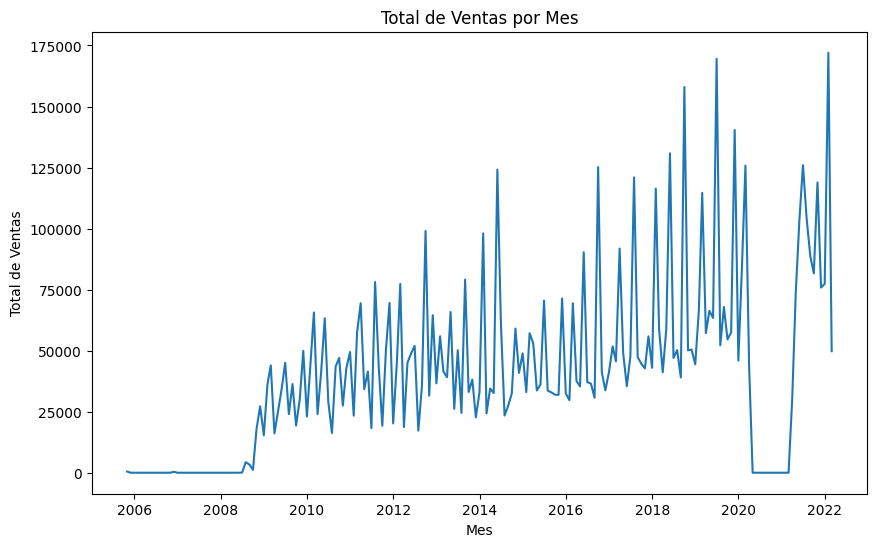

the best month for sales was: January 2022 with a total sales: 172032.0


In [28]:
# Question #6: Historically, what is the best month for sales?


import matplotlib.pyplot as plt

# Establecer la columna 'Date' como el índice
dt.set_index('Date', inplace=True)

# Agrupar los datos por mes y sumar el total de ventas
monthly_sales = dt.resample('M').sum()

# Time series Graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['OrderTotal'])
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Mes')
plt.show()

# the best month for sales 
max_sales_month = monthly_sales['OrderTotal'].idxmax()

# return the month
print("the best month for sales was:", max_sales_month.strftime("%B %Y"), "with a total sales:", monthly_sales.loc[max_sales_month]['OrderTotal'])




# Finished!

Hope this was not too difficult and slicing and dicing the datasets was some fun. Now head on back to the course and provide the answers to the questions from this exercise.